# Se connecter au serveur MongoDB

In [1]:
from pymongo import MongoClient

client = MongoClient("localhost", 27017)

# Afficher les BD disponibles 

In [ ]:
client.list_database_names()

# Sélectionner une bases de données

In [2]:
db = client['flightstats']
# le choix du bd permet de retrouver la même syntaxe que le shell de MongoDB

# Afficher les collections

In [3]:
db.list_collection_names()

['flights']

# Nombre de document d'une collection

In [4]:
db.flights.count_documents({})

20002

# Afficher un document

In [5]:
from pprint import pprint
pprint(db.flights.find_one())

{'_id': ObjectId('634727c85afd6caa6fed4c9e'),
 'date': '2001/01/13 14:56',
 'delay': 32,
 'destination': 'SJC',
 'distance': 417,
 'origin': 'SAN'}


# Insertion

In [6]:
myflight = { 'date': '2022/10/10 10:15',
 'delay': 12,
 'destination': 'SJC',
 'distance': 417,
 'origin': 'SAN'}
new_id = db.flights.insert_one(myflight).inserted_id
print(new_id)

634742d03646634ba81c9855


# Recherche par _id

In [7]:
# Remplacer la valeur _id par la sortie de la cellule précédente
db.flights.count_documents({"_id":"634742d03646634ba81c9855"})

0

In [8]:
db.flights.count_documents({"_id":new_id})

1

In [9]:
from bson.objectid import ObjectId
# Remplacer la valeur _id par la sortie de la cellule d'insertion de document
db.flights.count_documents({"_id":ObjectId("634742d03646634ba81c9855")})

1

# Supprimer

In [10]:
res = db.flights.delete_one({"_id":new_id})

In [11]:
# Nombre de documents supprimés 
res.deleted_count

1

# Recherche

In [12]:
# Les vols ayant un retard compris entre 60 et 61 minutes trié par le retard
res = db.flights.find({"$and" :[{"delay":{"$gte":60}},{"delay":{"$lte":61}}]}).sort("delay")

In [13]:
for fl in res:
    print(f"{fl['origin']}-{fl['destination']}: {fl['delay']}")

SJC-LAS: 60
SJC-MCI: 60
FLL-JAX: 60
ONT-PHX: 60
SFO-SAN: 60
OAK-LAX: 60
MDW-STL: 60
LAS-ONT: 60
OKC-MCI: 60
DAL-AMA: 60
SAN-TUS: 60
PHX-BHM: 60
PHX-ABQ: 60
BWI-CLE: 60
MHT-BWI: 60
BUR-OAK: 60
BNA-MDW: 60
LAS-SLC: 60
BWI-BNA: 60
SJC-BUR: 60
ISP-TPA: 60
PDX-BOI: 60
LAX-PHX: 60
OAK-SEA: 60
ABQ-PHX: 60
RNO-OAK: 60
SLC-PHX: 60
SAN-ELP: 60
OAK-LAX: 60
SFO-PHX: 60
SMF-BUR: 60
MDW-BHM: 60
OAK-LAX: 60
SAN-PHX: 60
MCI-PHX: 60
ABQ-PHX: 60
IAH-DAL: 60
PHX-ONT: 60
HOU-CRP: 60
SJC-LAX: 60
HOU-SAT: 60
STL-HOU: 60
MCI-BWI: 60
RNO-OAK: 60
SNA-SJC: 60
SLC-OAK: 60
DAL-AMA: 60
SFO-PHX: 60
ONT-PHX: 61
ELP-AUS: 61
HOU-MSY: 61
BWI-MCO: 61
MCI-MDW: 61


# Agrégation et visualisation du résultat


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#Calculer le retard par aéoroport de départ et afficher 5 premiers
pipeline = [
    {"$group": {"_id": "$origin", "moyenne": {"$avg": "$delay"}}},
    {"$sort": {"moyenne":-1}},
    {"$limit":5}]
res = db.flights.aggregate(pipeline)

In [15]:
df = pd.DataFrame(list(res))
df.rename({"_id":"Aéroport"}, axis=1, inplace=True)

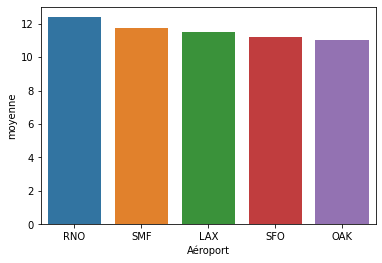

In [16]:
sns.barplot(data=df, y="moyenne", x="Aéroport")
plt.show()